In [877]:
# importing libraries
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models
import os
import spacy 
from spacy import displacy
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel, TfidfModel
import string
import nltk
import re
from nltk.tokenize import word_tokenize

In [878]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,text_lemm_clean,back_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,"['планировать', 'открывать', 'счет', 'банк', '...",планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,"['ситуация', 'рб', 'числиться', 'тунеядец', 'п...",ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,"['выполнять', 'комплекс', 'строительный', 'пом...",выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,"['енное', 'жкх', 'присылать', 'справка', 'поль...",енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,"['раздумье', 'полициальный', 'выбирать', 'star...",раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,"['происходить', 'неприятный', 'ситуация', 'авт...",происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,"['тересполь', 'брест', 'автобус', 'ездить', 'м...",тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,"['прививать', 'covid', 'желательно', 'pfizer',...",прививать covid желательно pfizer ом родитель ...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,"['добрага', 'шаноўныя', 'нехт', 'працуй', 'тур...",добрага шаноўныя нехт працуй турыстычный агенц...


In [879]:
lemm_texts_list = df['back_lemm'] 

In [880]:
lemm_texts_list 

0       планировать открывать счет банк pko начисление...
1       ситуация рб числиться тунеядец предоставлять п...
2       выполнять комплекс строительный помещение пека...
3       енное жкх присылать справка польский налоговый...
4       раздумье полициальный выбирать start центр вар...
                              ...                        
5627    происходить неприятный ситуация автовокзал зах...
5628    тересполь брест автобус ездить маршрутка приез...
5629    прививать covid желательно pfizer ом родитель ...
5630    добрага шаноўныя нехт працуй турыстычный агенц...
5631    оформлять доверенность поехать польша рб знако...
Name: back_lemm, Length: 5632, dtype: object

In [881]:
def tokenize(text):
    words = [word.strip(string.punctuation).lower() for word in text.split()]
    #words = [word for word in words if word and word not in stops]
    
    return words

In [882]:
norm_texts = [tokenize(text) for text in lemm_texts_list]

In [883]:
norm_texts

[['планировать',
  'открывать',
  'счет',
  'банк',
  'pko',
  'начисление',
  'зп',
  'отделение',
  'pko',
  'варшава',
  'русскоговорящий'],
 ['ситуация', 'рб', 'числиться', 'тунеядец', 'предоставлять', 'подтверждать'],
 ['выполнять',
  'комплекс',
  'строительный',
  'помещение',
  'пекарня',
  'бетонный',
  'малярный',
  'штукат'],
 ['енное',
  'жкх',
  'присылать',
  'справка',
  'польский',
  'налоговый',
  'подтверждать',
  'уплата',
  'налог',
  'территория',
  'рп',
  'справка',
  'ситуация',
  'рб',
  'числиться',
  'тунеядец',
  'предоставлять',
  'подтверждать'],
 ['раздумье',
  'полициальный',
  'выбирать',
  'start',
  'центр',
  'варшава',
  'приглашать',
  'желающий',
  'бесплатный',
  'обучение',
  'учиться',
  'муж'],
 ['посоветовать', 'тв', 'пакет', 'желательно'],
 ['студент', 'пересечение', 'граница', 'экспресс', 'пцр', 'тест', 'ответ'],
 ['польский',
  'требоваться',
  'декларант',
  'помощник',
  'декларант',
  'клиент',
  'прием',
  'обработка',
  'дежурство',
 

In [884]:
norm_texts[0][:10]

['планировать',
 'открывать',
 'счет',
 'банк',
 'pko',
 'начисление',
 'зп',
 'отделение',
 'pko',
 'варшава']

In [885]:
dictionary = gensim.corpora.Dictionary(norm_texts)

In [886]:
print(f'Size of dictionary before filter: {len(dictionary)}')

Size of dictionary before filter: 18285


In [887]:
# show topics of the model 
#model = gensim.models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=40)
topics = lda.show_topics(num_topics=15, num_words=20, formatted=False)

In [888]:
# filter out words that occur in more than 50 % of the documents and 
# words that ocuur less than 15 times
#dictionary.filter_extremes(no_above=0.5, no_below=5)

In [889]:
dictionary.filter_extremes(no_above=0.5, no_below=15)
print(f'Size of dictionary after filter: {len(dictionary)}')

Size of dictionary after filter: 911


In [890]:
print(dictionary)

Dictionary<911 unique tokens: ['pko', 'банк', 'варшава', 'зп', 'открывать']...>


In [891]:
# bag-of-words 
corpus = [dictionary.doc2bow(text) for text in norm_texts]

In [892]:
# gensim uses a memory efficient representation of document vectors
# every document is a list of tuples where the first element is an index of a word in the dictionary and
# the second element is a number of times it occured in this document
corpus[15][:15]

[(2, 1), (33, 1), (82, 1), (88, 1), (89, 1), (90, 1)]

In [893]:
[(dictionary[index], freq) for index, freq in corpus[15][:15]]

[('варшава', 1),
 ('граница', 1),
 ('правильно', 1),
 ('автобус', 1),
 ('брест', 1),
 ('ехать', 1)]

In [895]:
#LDA algorytm
lda = gensim.models.LdaModel(corpus, num_topics=12, id2word=dictionary, passes=40)

In [896]:
# # Build LDA model
# lda = gensim.models.LdaModel(corpus=corpus,
#                             id2word=dictionary,
#                             num_topics=15, 
#                             random_state=100,
#                             update_every=1,
#                             chunksize=100,
#                             passes=10,
#                             alpha='auto',
#                             per_word_topics=True)

In [897]:
# in each tuple we have:
# 1) number of the topic
# 2) list of most probable words for this topic and their probabilities
lda.print_topics()

[(0,
  '0.053*"помогать" + 0.047*"варшава" + 0.039*"беларусь" + 0.037*"группа" + 0.032*"контакт" + 0.030*"беларус" + 0.029*"украина" + 0.027*"благодарный" + 0.022*"польша" + 0.019*"личка"'),
 (1,
  '0.047*"язык" + 0.041*"польский" + 0.039*"занятие" + 0.037*"варшава" + 0.028*"приглашать" + 0.028*"онлайн" + 0.028*"английский" + 0.027*"группа" + 0.018*"доверенность" + 0.017*"уровень"'),
 (2,
  '0.090*"w" + 0.074*"i" + 0.059*"zł" + 0.052*"do" + 0.050*"z" + 0.039*"warszawa" + 0.038*"o" + 0.026*"od" + 0.024*"ul" + 0.022*"a"'),
 (3,
  '0.049*"варшава" + 0.028*"як" + 0.026*"дзень" + 0.024*"сябр" + 0.022*"прывітанне" + 0.022*"дзякуй" + 0.021*"ад" + 0.020*"ласка" + 0.018*"беларусі" + 0.018*"якия"'),
 (4,
  '0.071*"польша" + 0.060*"польский" + 0.053*"рб" + 0.035*"граница" + 0.030*"авто" + 0.020*"номер" + 0.020*"перевод" + 0.015*"справка" + 0.015*"беларусь" + 0.014*"пересечение"'),
 (5,
  '0.100*"виза" + 0.044*"польша" + 0.027*"приглашение" + 0.025*"беларусь" + 0.024*"рб" + 0.021*"выезжать" + 0.01

In [930]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
lda_topics = lda.show_topics(num_words=30)



In [931]:
topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

(4, '0.071*"польша" + 0.060*"польский" + 0.053*"рб" + 0.035*"граница" + 0.030*"авто" + 0.020*"номер" + 0.020*"перевод" + 0.015*"справка" + 0.015*"беларусь" + 0.014*"пересечение" + 0.014*"карантин" + 0.013*"рп" + 0.012*"информация" + 0.012*"автомобиль" + 0.012*"прививка" + 0.011*"тест" + 0.011*"договор" + 0.010*"белорусский" + 0.010*"въезд" + 0.010*"выезд" + 0.010*"продавать" + 0.010*"паспорт" + 0.009*"переводить" + 0.009*"курсы" + 0.009*"ездить" + 0.008*"пцр" + 0.007*"ес" + 0.007*"язык" + 0.007*"актуальный" + 0.007*"территория"')
(7, '0.043*"май" + 0.025*"находить" + 0.024*"муж" + 0.023*"собака" + 0.020*"процедура" + 0.018*"уезжать" + 0.018*"оставаться" + 0.017*"рассказывать" + 0.017*"размер" + 0.016*"украіны" + 0.015*"международный" + 0.015*"сын" + 0.015*"одежда" + 0.015*"внимание" + 0.014*"оставлять" + 0.014*"отзываться" + 0.012*"кг" + 0.012*"беларус" + 0.012*"пара" + 0.011*"море" + 0.011*"собираться" + 0.011*"учиться" + 0.011*"тренировка" + 0.011*"март" + 0.010*"литва" + 0.010*"трен

In [898]:
# Compute Coherence Score
cm = CoherenceModel(model=lda, texts=norm_texts, dictionary=dictionary, coherence='c_v')
cm.get_coherence()

0.4604076410034941

In [899]:
u_mass_cm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')

In [900]:
u_mass_cm.get_coherence()

-7.079560443586293

In [901]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -6.2418942732354665


In [902]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
topic_data =  pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.display(topic_data)




C:\Users\dell\.anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [919]:
#visualization libraries 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

In [920]:
#preparation for wordcloud
topics = lda.show_topics(num_topics=15, num_words=20, formatted=False)
topic_words = dict(topics)

In [923]:
def plot_word_cloud(topics, topic_number):

    # get frequency for topic
    
    #text = dict(topics[topic_number][1])
    topic_words = dict(topics[topic_number][1])
    # build word_cloud
    wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=20, width=300, height=300, collocations=False, colormap='tab20b')
    wordcloud = wordcloud.generate_from_frequencies(topic_words)
    plt.figure(figsize=(7, 4))
    plt.title("Topic {}".format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  

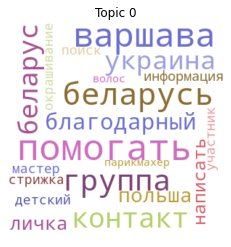

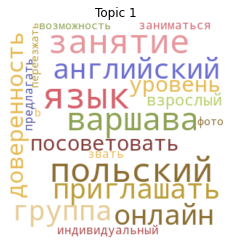

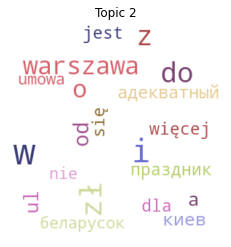

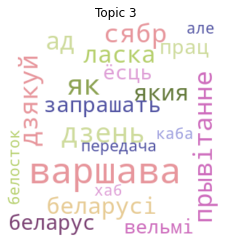

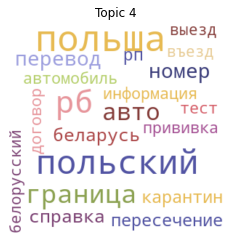

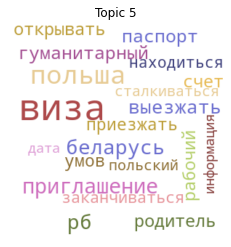

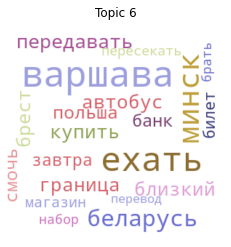

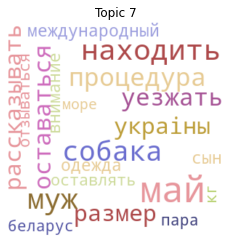

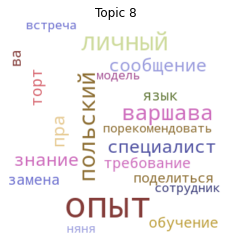

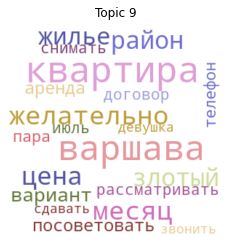

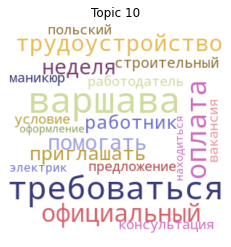

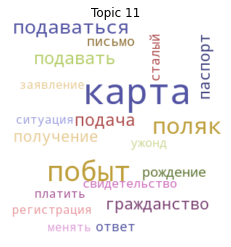

In [924]:
for topic_number in range(0,12):
    plot_word_cloud(topics, topic_number)